In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
mask_use = df['Use']
mask_LIR = df['LIR']

filename = '../DATA/ZFOURGE/CDFS/CDFS_FLUX.tsv'
data = pd.read_csv(filename, sep='\t', skiprows=117)
uvj = pd.DataFrame(data)
uvj = uvj.iloc[2:]
uvj = uvj.apply(pd.to_numeric, errors='coerce')
uvj['Use'] = mask_use
uvj['LIR'] = mask_LIR
uvj = uvj[uvj['Use'] == 1]
uvj = uvj[uvj['LIR'] > 0]

C:\Users\n10480129\AppData\Local\Temp\ipykernel_20340\737518885.py:11: DtypeWarning: Columns (0,1,2,3,4,5,7,9,11,13,15,17,18,19,21,23,25,27,29,31,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, sep='\t', skiprows=117)


Quiescent: 675
Star-forming: 7811


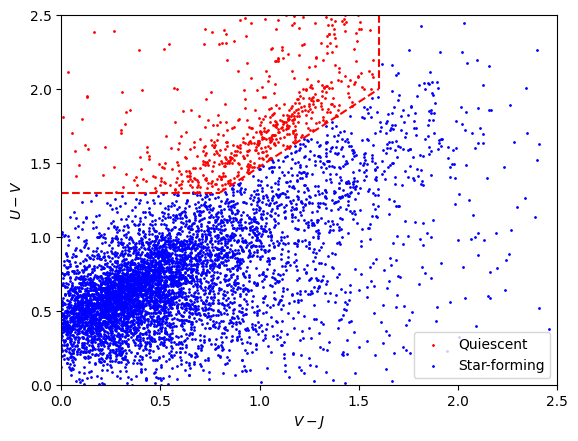

In [37]:
U = uvj['FU'].values # uJy
V = uvj['FV'].values # uJy
J = uvj['FJ'].values # uJy

U_ab = 25 - 2.5*np.log10(U) # apparent magnitude -> AB magnitude
V_ab = 25 - 2.5*np.log10(V) # apparent magnitude -> AB magnitude
J_ab = 25 - 2.5*np.log10(J) # apparent magnitude -> AB magnitude

U_V = U_ab - V_ab
V_J = V_ab - J_ab

mask_q = (U_V > 1.3) & (V_J < 1.6) & (U_V > 0.88*V_J+0.59)
print(f'Quiescent: {mask_q.sum()}')
print(f'Star-forming: {len(U_V) - mask_q.sum()}')

plt.scatter(V_J[mask_q], U_V[mask_q], s=1, label='Quiescent', color='red')
plt.scatter(V_J[~mask_q], U_V[~mask_q], s=1, label='Star-forming', color='blue')
plt.xlabel('$V - J$')
plt.ylabel('$U - V$')
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.hlines(1.3, 0, 0.8, colors='red', linestyles='dashed')
plt.vlines(1.6, 2, 2.5, colors='red', linestyles='dashed')
plt.plot([0.8, 1.6], [1.3, 2.0], color='red', linestyle='dashed')
plt.legend()
plt.show()